In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:

dataset_path = ""


train_dir = os.path.join(dataset_path, r"C:\Users\ASUS\Desktop\brain tumor prediction\brain_tumor_dataset\Training")
test_dir = os.path.join(dataset_path, r"C:\Users\ASUS\Desktop\brain tumor prediction\brain_tumor_dataset\Testing")


categories = ["glioma", "meningioma", "notumor", "pituitary"]


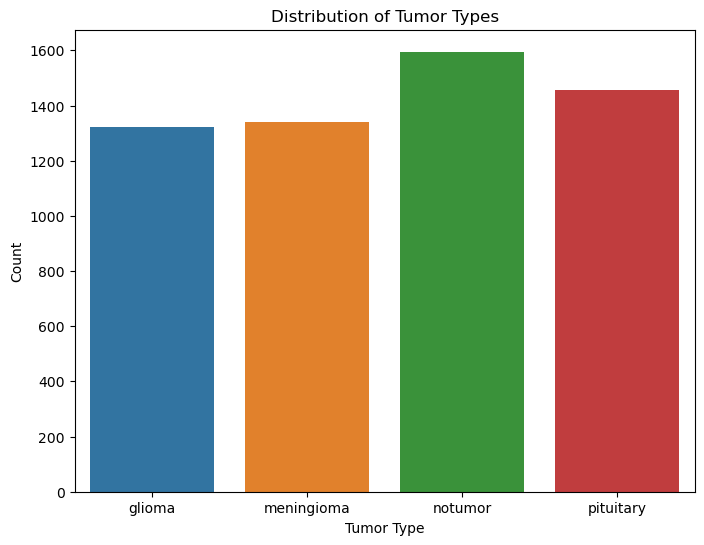

In [ ]:

train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)


plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()


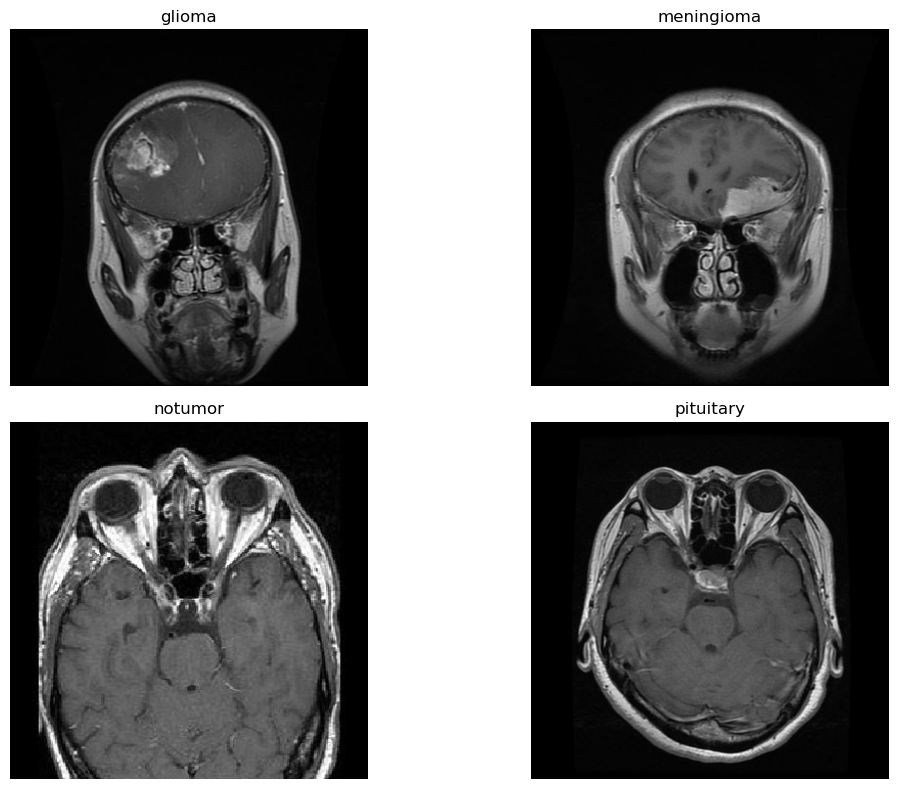

In [ ]:

plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:

image_size = (150, 150)


batch_size = 32


epochs = 50

In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:

model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/50


178/178 [==============================] - 202s 1s/step - loss: 0.9582 - accuracy: 0.5833 - val_loss: 2.5434 - val_accuracy: 0.3852
Epoch 2/50
178/178 [==============================] - 90s 506ms/step - loss: 0.7314 - accuracy: 0.7042 - val_loss: 0.8247 - val_accuracy: 0.6758
Epoch 3/50
178/178 [==============================] - 85s 476ms/step - loss: 0.6383 - accuracy: 0.7528 - val_loss: 1.0688 - val_accuracy: 0.6031
Epoch 4/50
178/178 [==============================] - 77s 430ms/step - loss: 0.5626 - accuracy: 0.7843 - val_loss: 0.6983 - val_accuracy: 0.7375
Epoch 5/50
178/178 [==============================] - 62s 351ms/step - loss: 0.4698 - accuracy: 0.8283 - val_loss: 0.6199 - val_accuracy: 0.7750
Epoch 6/50
178/178 [==============================] - 73s 411ms/step - loss: 0.4403 - accuracy: 0.8278 - val_loss: 0.8056 - val_accuracy: 0.7172
Epoch 7/50
178/178 [==============================] - 76s 424ms/step - loss: 0.3939 - accuracy: 0.8556 - val_loss: 0.3313 - val_ac

The model is trained using the **fit** method. The ***train_generator*** provides the **training data**, and the ***test_generator*** provides the **validation data**. The ***steps_per_epoch*** and ***validation_steps*** are set to ensure that the entire training and validation datasets are processed in one epoch. The training progress and performance metrics are stored in the history object.

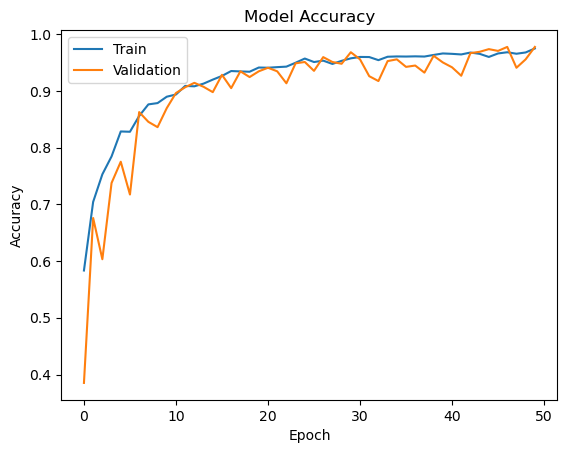

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

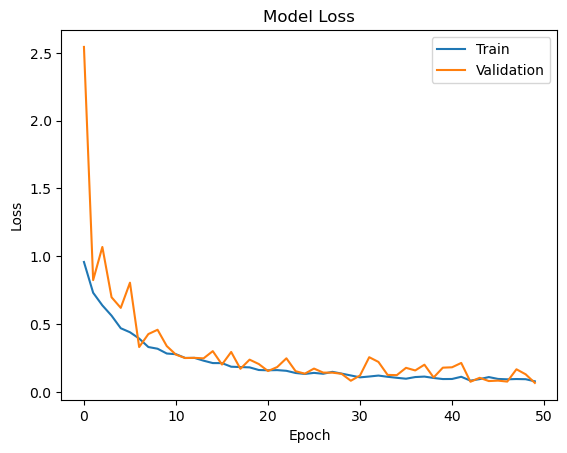

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:

loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 [==============================] - 4s 91ms/step - loss: 0.0668 - accuracy: 0.9773
Test Loss: 0.06675361096858978
Test Accuracy: 0.977343738079071


In [ ]:

model.save("model.h5")

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/41 [==============================] - 4s 94ms/step


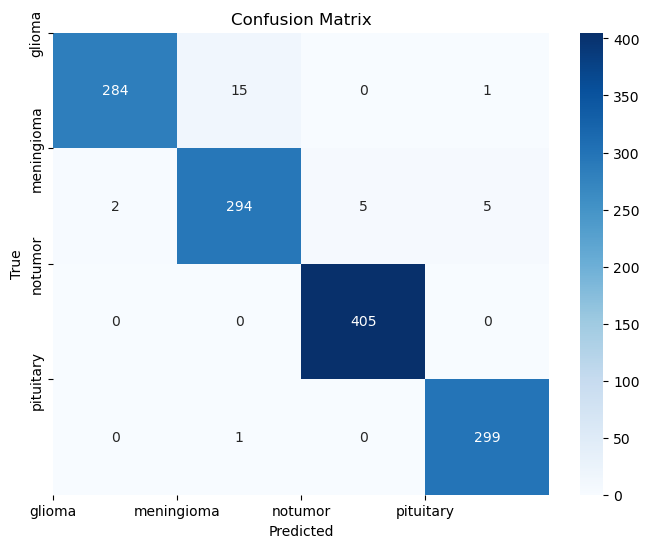

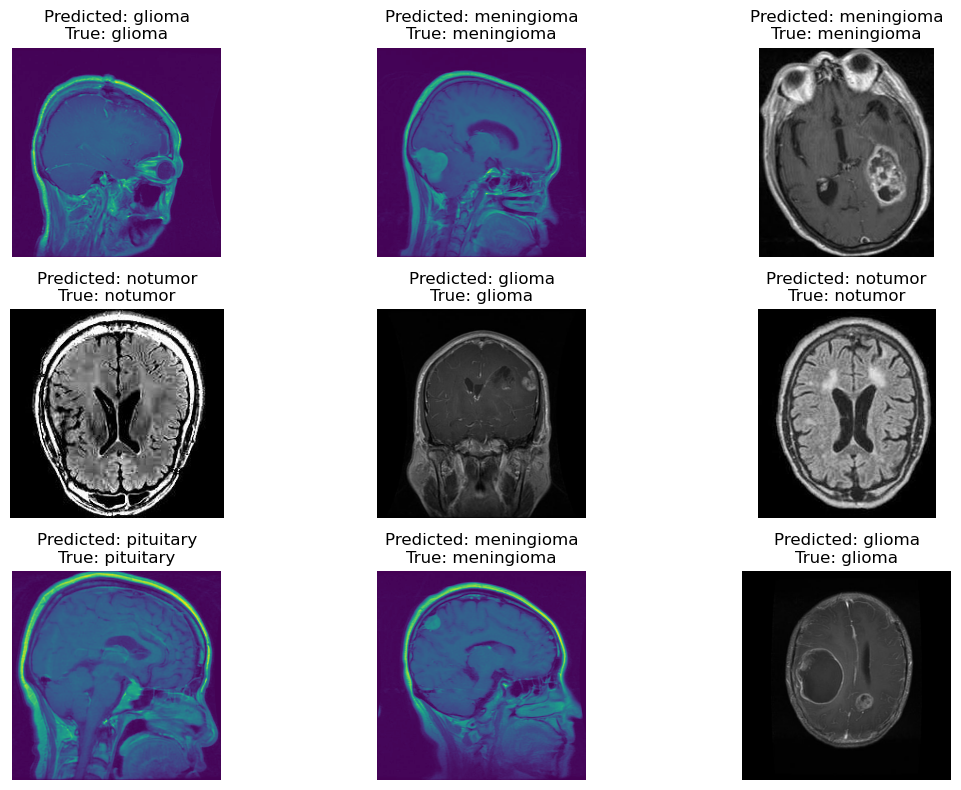

In [ ]:

predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes


confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()


test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


Class: glioma
Precision: 0.993006993006993
Recall: 0.9466666666666667
F1-Score: 0.969283276450512

Class: meningioma
Precision: 0.9483870967741935
Recall: 0.9607843137254902
F1-Score: 0.9545454545454546

Class: notumor
Precision: 0.9878048780487805
Recall: 1.0
F1-Score: 0.9938650306748467

Class: pituitary
Precision: 0.980327868852459
Recall: 0.9966666666666667
F1-Score: 0.9884297520661156



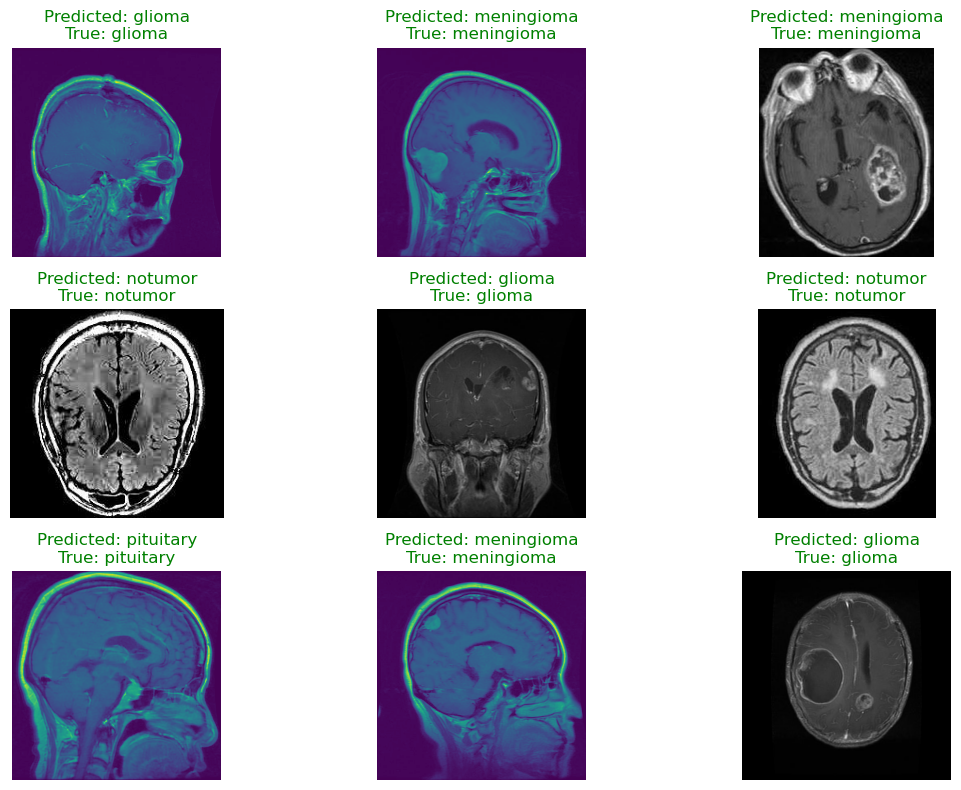

In [ ]:

precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)


for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()


plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:

model.save("brain_tumor_detection_model.h5")
